# Bike Sharing Demand Prediction: A Linear Regression Case Study

---

## 1. Project Overview

### 1.1 Problem Statement
BoomBikes, a bike-sharing provider in the U.S., has seen a significant drop in revenue due to the COVID-19 pandemic. To stay competitive post-lockdown, the company aims to understand the factors influencing the demand for bike rentals. This insight will help them anticipate demand patterns and adjust their strategies to maximize revenue.

**Objectives:**
- Identify the key variables that significantly impact bike-sharing demand.
- Analyze how these variables influence rental demand in the American market.

---

## 2. Business Goal
Using available data, the goal is to create a demand prediction model for shared bikes. The model will enable management to:
- Comprehend the impact of different features on demand.
- Adjust business strategies based on demand trends to better serve customers and optimize revenue.

---

## 3. Dataset Description

The dataset contains information about daily bike rentals across various seasons and weather conditions. Below are the key variables in the dataset:

| Feature       | Description                                                                                                                                                        |
|---------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **instant**   | Record index                                                                                                                                                       |
| **dteday**    | Date                                                                                                                                                               |
| **season**    | Season (1: Spring, 2: Summer, 3: Fall, 4: Winter)                                                                                                                  |
| **yr**        | Year (0: 2018, 1: 2019)                                                                                                                                            |
| **mnth**      | Month (1 to 12)                                                                                                                                                    |
| **holiday**   | Holiday indicator (1: Holiday, 0: Non-holiday)                                                                                                                     |
| **weekday**   | Day of the week                                                                                                                                                    |
| **workingday**| Indicates if the day is a working day (1: Yes, 0: No)                                                                                                              |
| **weathersit**| Weather situation (1: Clear, 2: Misty, 3: Light Snow/Rain, 4: Heavy Rain/Snow)                                                                                     |
| **temp**      | Temperature in Celsius                                                                                                                                             |
| **atemp**     | Apparent (feels-like) temperature in Celsius                                                                                                                       |
| **hum**       | Humidity                                                                                                                                                           |
| **windspeed** | Wind speed                                                                                                                                                         |
| **casual**    | Count of casual (non-registered) users                                                                                                                             |
| **registered**| Count of registered users                                                                                                                                          |
| **cnt**       | Total bike rental count (sum of casual and registered users)                                                                                                       |

**Note:** The variable **`cnt`** (total rentals) will be our target variable for the demand prediction model.

---

## 4. Model Building Approach

To accurately predict bike rental demand (`cnt`), we will:
1. Preprocess and analyze the dataset to understand feature relationships.
2. Identify significant predictors of bike-sharing demand.
3. Build a linear regression model using the refined set of predictors.

This model will guide the management team at BoomBikes in decision-making and planning for optimal business strategies to meet anticipated demand.


## Outline

1. Reading, Understanding and Visualizing the Data
  
2. Exploratory Data Analysis (EDA)

3. Data Preparation

4. Splitting the Data and Rescaling
   
5. Training the Model

6. Residual Analysis
   
7. Making Predictions and Model Evaluation

### 1. Reading, Understanding, and Visualizing the Data

In [1]:
# Import necessaries libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import warnings

# Ignoring the warnings
warnings.filterwarnings('ignore')

#configuring max rows and columns to display
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 100)

#configuring to display all decimal values upto 2 decimal precision
pd.options.display.float_format = '{:.2f}'.format

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

#### Load data from day.csv

In [4]:
raw_bike_data = pd.read_csv('day.csv')
raw_bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.11,18.18,80.58,10.75,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.90,17.69,69.61,16.65,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.05,9.47,43.73,16.64,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.20,10.61,59.04,10.74,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.31,11.46,43.70,12.52,82,1518,1600


In [5]:
# understand data shape (number_of_rows, number_of_columns)
raw_bike_data.shape

(730, 16)

#### Checking for Null values

In [6]:
#displaying columns with number of null values
raw_bike_data.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

##### There are no missing values in the data

#### Checking for Unique Values

In [7]:
raw_bike_data.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

#### Droping Columns
1. **instant**: Its index of all instances so thi field is not required for analysis as it adds no significant value
2. **dteday**: Its a date time field which has already been segregated to month, year and weekday
3. **casual** and **registered**: Combine values of both is already present in **cnt**

In [8]:
#List of columns to drop
columns_to_drop = [
    'instant', 'dteday', 'casual', 'registered'
]

#dropping those columns
raw_bike_data = raw_bike_data.drop(columns = columns_to_drop)

In [9]:
#Check Dataframe shape
raw_bike_data.shape

(730, 12)

In [10]:
raw_bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [11]:
clean_bike_data = raw_bike_data
clean_bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.11,18.18,80.58,10.75,985
1,1,0,1,0,0,0,2,14.90,17.69,69.61,16.65,801
2,1,0,1,0,1,1,1,8.05,9.47,43.73,16.64,1349
3,1,0,1,0,2,1,1,8.20,10.61,59.04,10.74,1562
4,1,0,1,0,3,1,1,9.31,11.46,43.70,12.52,1600


In [12]:
clean_bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


#### Checking for Duplicate Values

In [13]:
clean_bike_data[clean_bike_data.duplicated()]
clean_bike_data.shape

(730, 12)

##### There are no Duplicate Values

#### Converting Categorical fields to suitable values

In [14]:
#Converting month values to text with three initials using datetime function
clean_bike_data['mnth'] = pd.to_datetime(clean_bike_data['mnth'], format='%m').dt.strftime('%b')
clean_bike_data['mnth'].value_counts()

mnth
Jan    62
Mar    62
May    62
Jul    62
Aug    62
Oct    62
Dec    62
Apr    60
Jun    60
Sep    60
Nov    60
Feb    56
Name: count, dtype: int64

In [15]:
#Mapping and Converting weekday values to text with three initials
weekday_map = {
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
}

clean_bike_data['weekday'] = clean_bike_data['weekday'].map(weekday_map)
clean_bike_data['weekday'].value_counts()

weekday
Sat    105
Sun    105
Mon    105
Tue    104
Thu    104
Fri    104
Wed    103
Name: count, dtype: int64

In [16]:
#Replacing season values to text
clean_bike_data.season.replace({1:"Spring", 2:"Summer", 3:"Fall", 4:"Winter"},inplace = True)
clean_bike_data['season'].value_counts()

season
Fall      188
Summer    184
Spring    180
Winter    178
Name: count, dtype: int64

In [17]:
#Replacing weather values to text
clean_bike_data.weathersit.replace({1:'Good', 2:'Moderate', 3:'Bad', 4:'Severe'},inplace = True)
clean_bike_data['weathersit'].value_counts()

weathersit
Good        463
Moderate    246
Bad          21
Name: count, dtype: int64

In [18]:
#Replacing year boolean values to years
clean_bike_data.yr.replace({0:2018, 1:2019},inplace = True)
clean_bike_data['yr'].value_counts()

yr
2018    365
2019    365
Name: count, dtype: int64

In [19]:
#Replacing holiday values to text
clean_bike_data.holiday.replace({0:'No', 1:'Yes'},inplace = True)
clean_bike_data['holiday'].value_counts()

holiday
No     709
Yes     21
Name: count, dtype: int64

In [20]:
#Replacing working day values to text
clean_bike_data.workingday.replace({0:'No', 1:'Yes'},inplace = True)
clean_bike_data['workingday'].value_counts()

workingday
Yes    499
No     231
Name: count, dtype: int64

In [21]:
bike_data = clean_bike_data
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,2018,Jan,No,Sat,No,Moderate,14.11,18.18,80.58,10.75,985
1,Spring,2018,Jan,No,Sun,No,Moderate,14.90,17.69,69.61,16.65,801
2,Spring,2018,Jan,No,Mon,Yes,Good,8.05,9.47,43.73,16.64,1349
3,Spring,2018,Jan,No,Tue,Yes,Good,8.20,10.61,59.04,10.74,1562
4,Spring,2018,Jan,No,Wed,Yes,Good,9.31,11.46,43.70,12.52,1600


In [22]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    object 
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    object 
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(2), object(6)
memory usage: 68.6+ KB


#### Common Functions

In [23]:
def create_outlier_boxplot(data, column, title):
    """
    Generalized function to plot a boxplot.

    Parameters:
    - data: DataFrame containing the data.
    - column: Column to plot.
    - title: Title of the plot.
    """

    #create boxplot
    sns.boxplot(y=data[column], palette='pastel')

    #set titles and labels
    plt.title(title)
    plt.ylabel('Values', fontsize=12)

    # Format y-axis with commas
    plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))

In [24]:
def create_boxplot(data, y_column, title, x_column):
    """
    Generalized function to plot a boxplot.

    Parameters:
    - data: DataFrame containing the data.
    - x_column: Column to plot on the x-axis.
    - y_column: Column to plot on the y-axis.
    - title: Title of the plot.
    """
    
    #create boxplot
    sns.boxplot(data=data, x=x_column, y=y_column, palette=palette)

    #set titles and labels
    plt.title(title)
    plt.ylabel('Values', fontsize=12)

    # Format y-axis with commas
    plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))

In [25]:
def create_barplot(data, x_column, y_column, title, xlabel, ylabel, palette, rotation=0):
    """
    Generalized function to plot a lineplot.

    Parameters:
    - data: DataFrame containing the data.
    - x_column: Column to plot on the x-axis.
    - y_column: Column to plot on the y-axis.
    - title: Title of the plot.
    - xlabel: Label for the x-axis.
    - ylabel: Label for the y-axis.
    - palette: Color palette for the plot.
    - rotation: Rotaion for x-label(Default is 0)
    """

    #Show the plot
    sns.barplot(x=x_column, y=y_column, data=data, palette=palette, estimator='median', ci=None)

    #set titles and labels
    plt.title(title)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)

    #set rotaion for x_labels if required
    plt.xticks(rotation=rotation)

    #adjust the layout
    plt.tight_layout()

    #Show the plot
    plt.show()

In [26]:
def create_heatmap(data, title):
    """
    Generalized function to plot a lineplot.

    Parameters:
    - data: DataFrame containing the data.
    - title: Title of the plot.
    """

    #Show the plot
    sns.heatmap(data, annot=True, cmap='coolwarm', linewidths=.5)

    #set title
    plt.title(title)

    #adjust the layout
    plt.tight_layout()

    #Show the plot
    plt.show()

In [27]:
def create_regplot(data, x_column, title):
    """
    Generalized function to plot a lineplot.

    Parameters:
    - data: DataFrame containing the data.
    - x_column: Column to plot on the x-axis.
    - title: Title of the plot.
    """

    #Show the plot
    sns.regplot(data, y="cnt", x=x_column)

    #set title
    plt.title(title)


#### Outlier Treatement

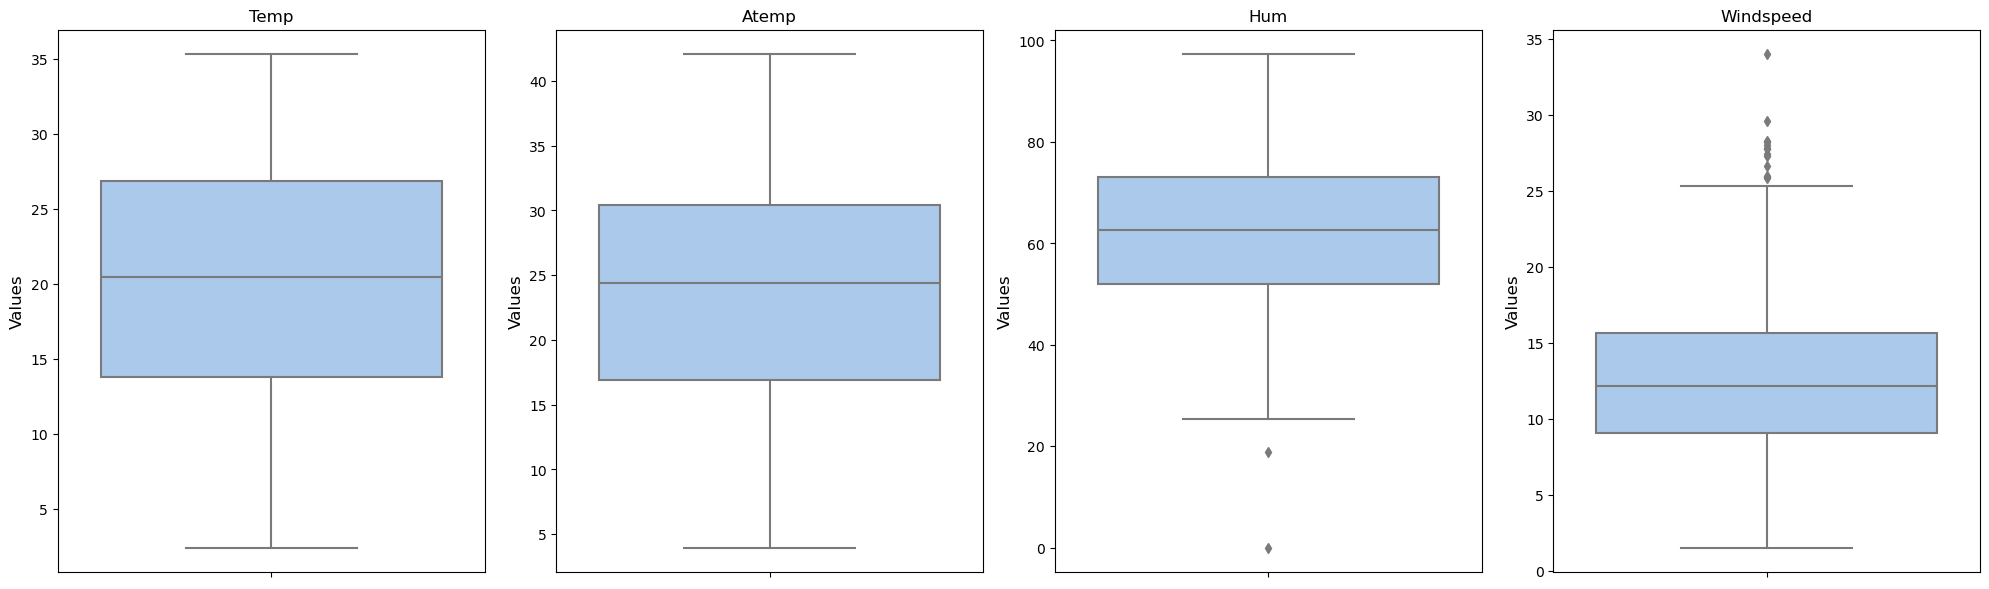

In [28]:
# Draw box plots for indepent variables with continuous values
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(20, 6))

# Set up the subplots in a single row
for i, col in enumerate(cols, 1):
    plt.subplot(1, len(cols), i)  # 1 row, number of columns based on cols length
    create_outlier_boxplot(bike_data, col, col.title())

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

##### There are no significant outliers

In [29]:
bike_data.describe()

,yr,temp,atemp,hum,windspeed,cnt
count,730.00,730.00,730.00,730.00,730.00,730.00
mean,2018.50,20.32,23.73,62.77,12.76,4508.01
std,0.50,7.51,8.15,14.24,5.20,1936.01
min,2018.00,2.42,3.95,0.00,1.50,22.00
25%,2018.00,13.81,16.89,52.00,9.04,3169.75
50%,2018.50,20.47,24.37,62.62,12.13,4548.50
75%,2019.00,26.88,30.45,72.99,15.63,5966.00
max,2019.00,35.33,42.04,97.25,34.00,8714.00


### 2. EXPLORATORY DATA ANALYSIS (EDA)

In [30]:
#Set common theme for all the graphs
sns.set_theme(style="whitegrid")

#Set common pallet for all the graphs
palette = sns.color_palette("husl", 10) 

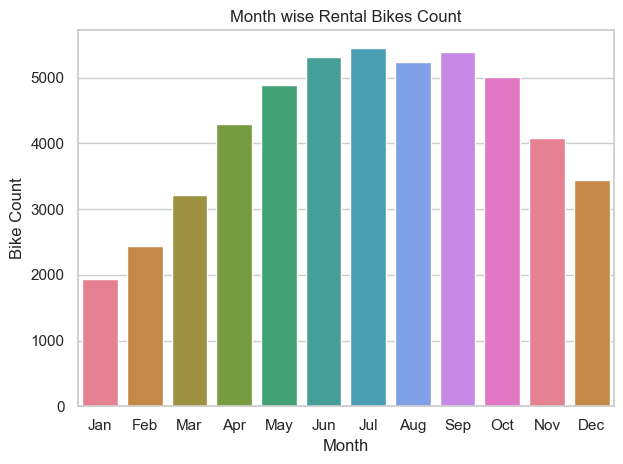

In [31]:
create_barplot(x_column='mnth', y_column='cnt', data=bike_data, title='Month wise Rental Bikes Count', xlabel='Month', 
               ylabel='Bike Count', palette=palette)

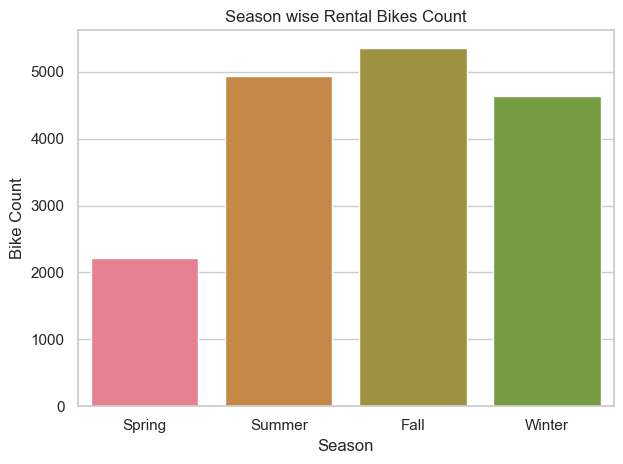

In [33]:
create_barplot(x_column='season', y_column='cnt', data=bike_data, title='Season wise Rental Bikes Count', xlabel='Season', 
               ylabel='Bike Count', palette=palette)

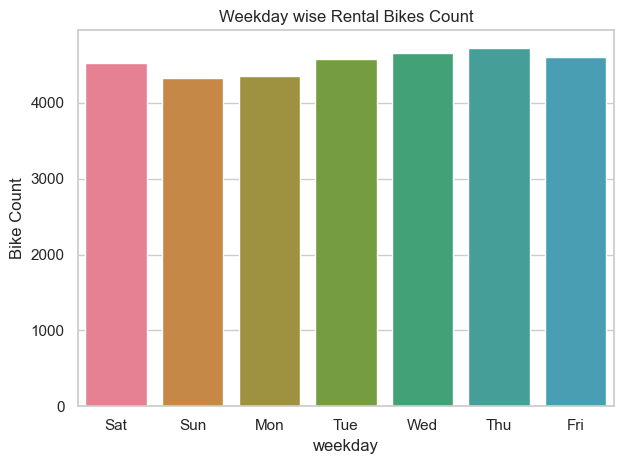

In [34]:
create_barplot(x_column='weekday', y_column='cnt', data=bike_data, title='Weekday wise Rental Bikes Count', xlabel='weekday', 
               ylabel='Bike Count', palette=palette)

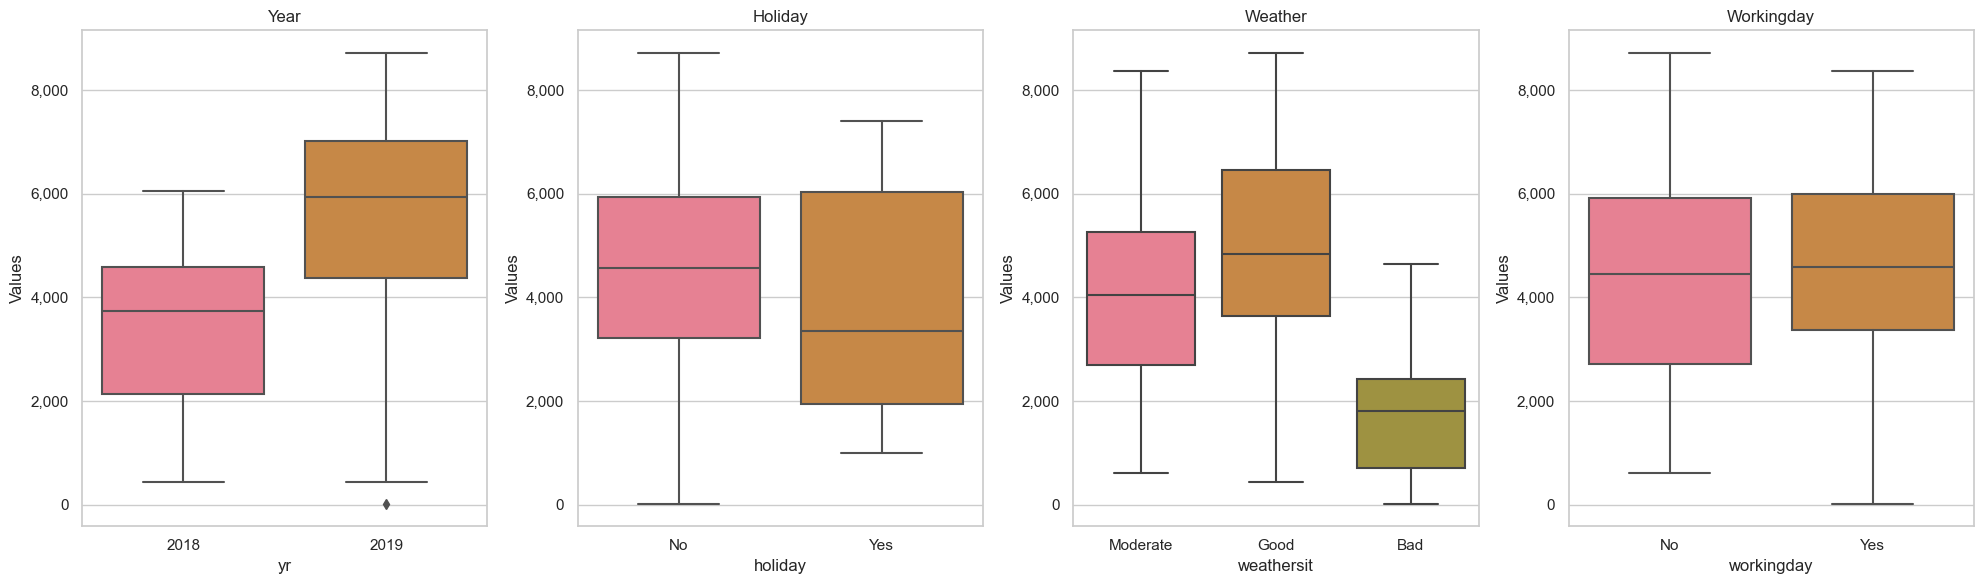

In [35]:
# Draw box plots for indepent variables with categorical values
cols = ['yr', 'holiday', 'weathersit', 'workingday']
title=['Year', 'Holiday', 'Weather', 'Workingday']
plt.figure(figsize=(20, 6))

# Set up the subplots in a single row
for i, col in enumerate(cols):
    plt.subplot(1, len(cols), i+1)  # 1 row, number of columns based on cols length
    create_boxplot(data=bike_data, x_column=col, y_column='cnt', title=title[i])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

<Figure size 1500x3000 with 0 Axes>

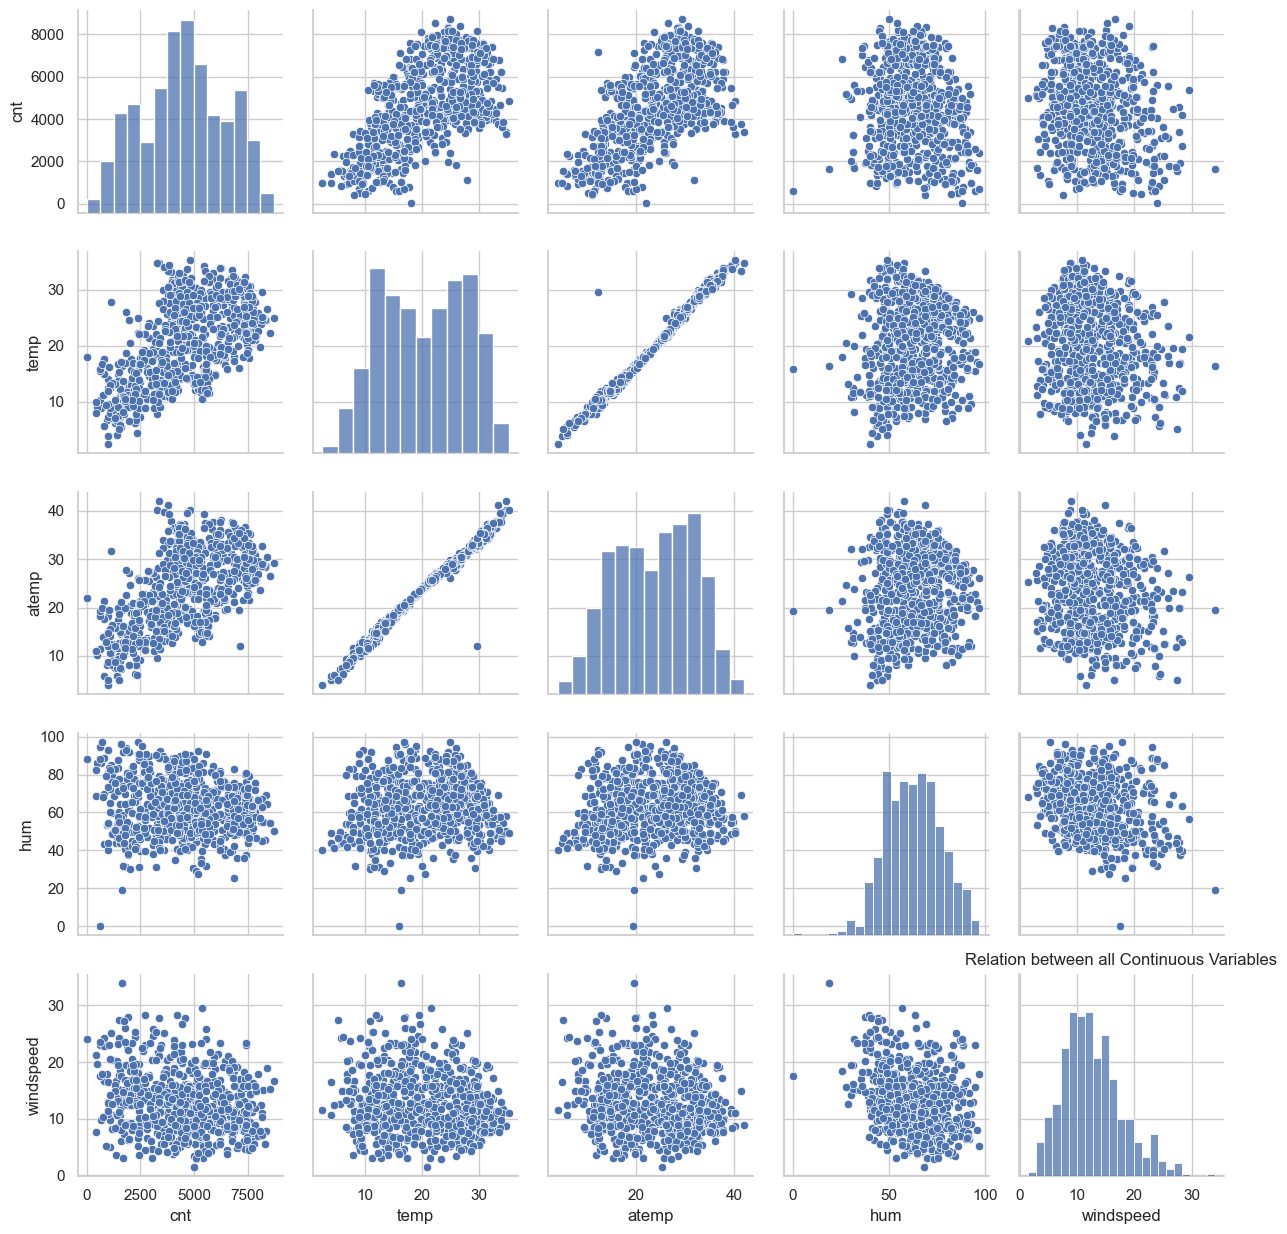

In [38]:
#Draw pairplots for continuous numeric variables using seaborn
plt.figure(figsize = (15,30))
sns.pairplot(data=bike_data, vars=['cnt', 'temp', 'atemp', 'hum','windspeed'], palette=palette)
plt.title("Relation between all Continuous Variables")
plt.tight_layout()
plt.show()

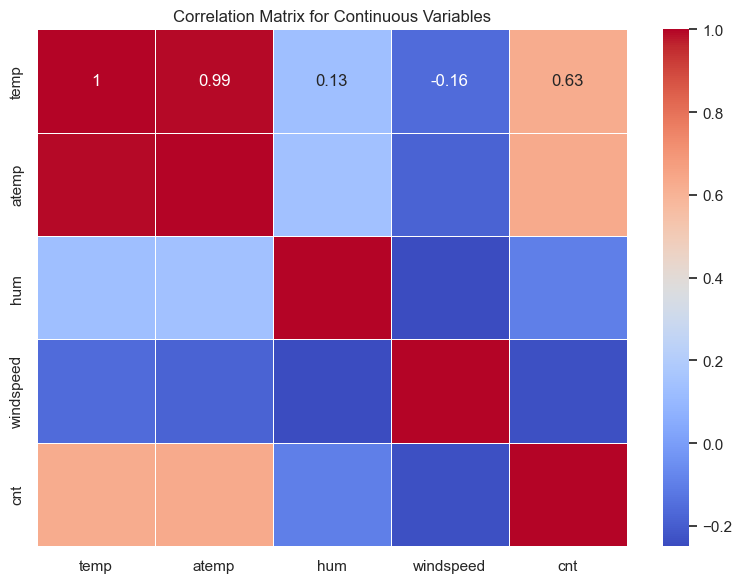

In [40]:
# Create the figure
plt.figure(figsize=(8, 6))

#Correlation Matrix for all continuous variables
create_heatmap(bike_data[['temp', 'atemp', 'hum', 'windspeed','cnt']].corr(), 'Correlation Matrix for Continuous Variables')

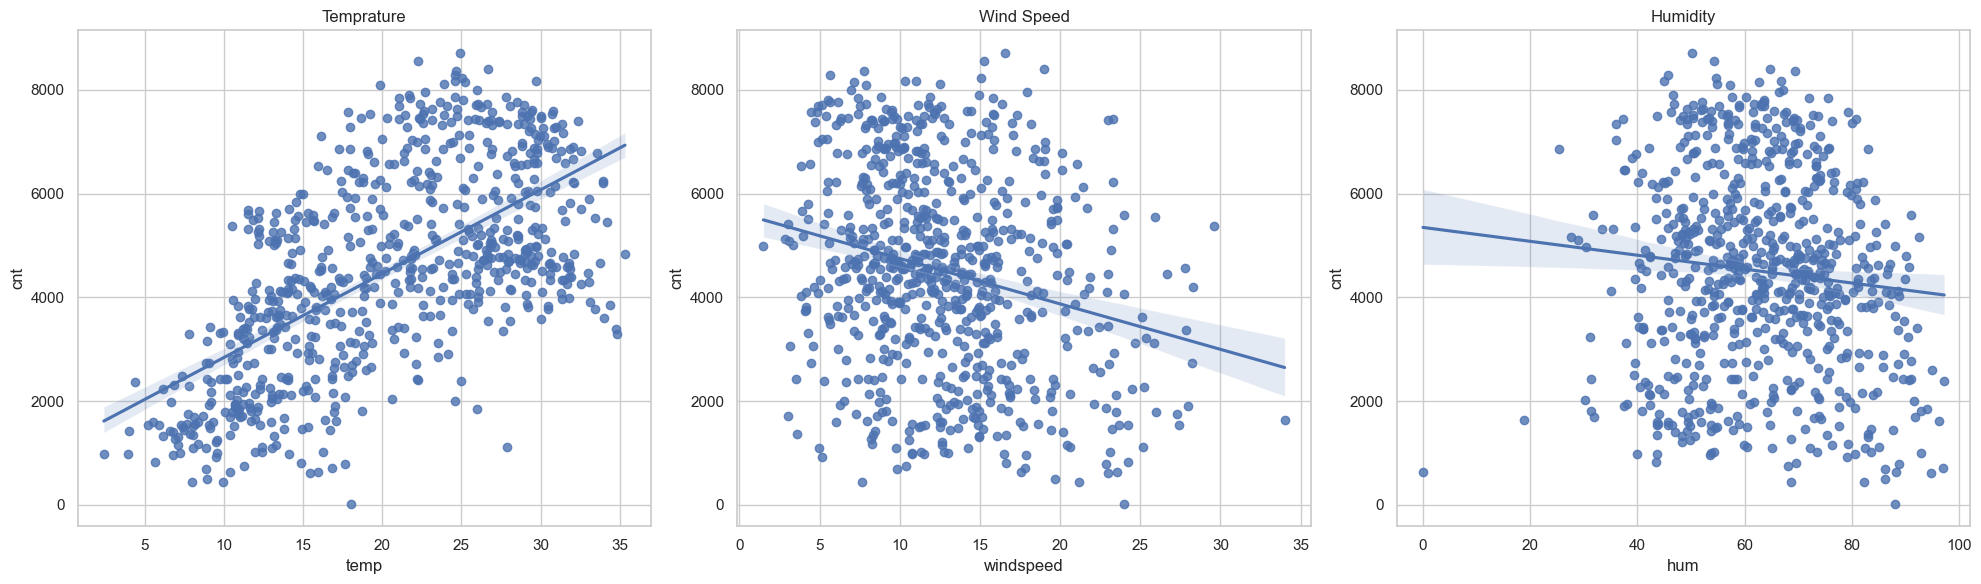

In [41]:
#Regression plot for all independent continuous variables
cols = ['temp', 'windspeed', 'hum']
title=['Temprature', 'Wind Speed', 'Humidity']
plt.figure(figsize=(20, 6))

# Set up the subplots in a single row
for i, col in enumerate(cols):
    plt.subplot(1, len(cols), i+1)  # 1 row, number of columns based on cols length
    create_regplot(data=bike_data, x_column=col, title=title[i])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

#### Insights

##### 1. Categorical Variables
- **Year**: In 2019, bike bookings experienced a remarkable **64% increase** compared to 2018, with the median number of bookings rising from **3,800** to **6,000**. 
- **Month**: Approximately **55% of bike bookings** occurred in May, June, July, August, and September, with a median exceeding **5,000 bookings per month**. This indicates a strong seasonal trend in demand.
- **Season**: Nearly **32% of bike bookings** took place in Fall, while Summer and Winter accounted for **27%** and **25%** of total bookings, respectively. This highlights the significance of seasonality in influencing bike usage.
- **Week Day**: Bookings showed consistent trends across weekdays, with each day contributing between **13.5% and 14.75%** of total bookings and medians ranging from **4,300 to 4,800**. This suggests a relatively stable demand pattern throughout the week.
- **Working Day**: Approximately **69% of bike bookings** occurred on working days, with a median around **4,500 bookings**. This indicates a strong preference for bike usage during weekdays.
- **Holiday**: A striking **97.6% of bike bookings** happened on non-holidays, indicating a significant bias in the data related to holiday periods.
- **Weather**: Around **68% of bike bookings** were made during good weather, with a median close to **5,000 bookings**. Additionally, approximately **30%** of bookings occurred during moderate weather, suggesting that weather conditions play a critical role in bike demand.le in bike demand.


##### 2. Continuous Variables
- **Windspeed** shows high variability, with a noticeable trend of **decreasing bookings as windspeed increases**. This suggests that higher wind speeds may negatively impact bike usage.
- **Humidity** shows high variability, with a noticeable trend of **decreasing bookings as humidity increases**. This suggests that more humidity may negatively impact bike usage.
- **Bike demand** is positively correlated with **temperature**, showing a clear linear trend where **bookings increase as temperature rises**. This suggests that warmer temperatures may drive higher bike usage.
- The pair plot indicates a **linear relationship** between **'temp,' 'atemp,'** and **'cnt,'** suggesting that as temperature rises, bike bookings also increase.
- Both **'temp'** and **'atemp'** show a strong correlation with the target variable **'cnt'** and are also highly correlated with each other, highlighting their significance as predictors of bike demand.

### 3. Data Preparation

In [42]:
bike_data_copy = bike_data
bike_data_copy.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,2018,Jan,No,Sat,No,Moderate,14.11,18.18,80.58,10.75,985
1,Spring,2018,Jan,No,Sun,No,Moderate,14.90,17.69,69.61,16.65,801
2,Spring,2018,Jan,No,Mon,Yes,Good,8.05,9.47,43.73,16.64,1349
3,Spring,2018,Jan,No,Tue,Yes,Good,8.20,10.61,59.04,10.74,1562
4,Spring,2018,Jan,No,Wed,Yes,Good,9.31,11.46,43.70,12.52,1600


In [43]:
#Replacing working day values to boolean
bike_data_copy.workingday.replace({'No': 0, 'Yes': 1},inplace = True)

#Replacing holiday values to boolean
bike_data_copy.holiday.replace({'No': 0, 'Yes': 1},inplace = True)

#Replacing years to boolean values
bike_data_copy.yr.replace({2018: 0, 2019: 1},inplace = True)

In [44]:
#Creating Dummy variables for season, month, weekday and weather
bike_data_copy = pd.get_dummies(data=bike_data_copy,columns=["season","mnth","weekday"],drop_first=True)

#Not making drop first for weather data to not loose severe values
bike_data_copy = pd.get_dummies(data=bike_data_copy,columns=["weathersit"])

In [45]:
print("Shape of Bike Data:", bike_data_copy.shape)
bike_data_copy.head()

Shape of Bike Data: (730, 31)


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Bad,weathersit_Good,weathersit_Moderate
0,0,0,0,14.11,18.18,80.58,10.75,985,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True
1,0,0,0,14.90,17.69,69.61,16.65,801,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True
2,0,0,1,8.05,9.47,43.73,16.64,1349,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False
3,0,0,1,8.20,10.61,59.04,10.74,1562,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False
4,0,0,1,9.31,11.46,43.70,12.52,1600,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False


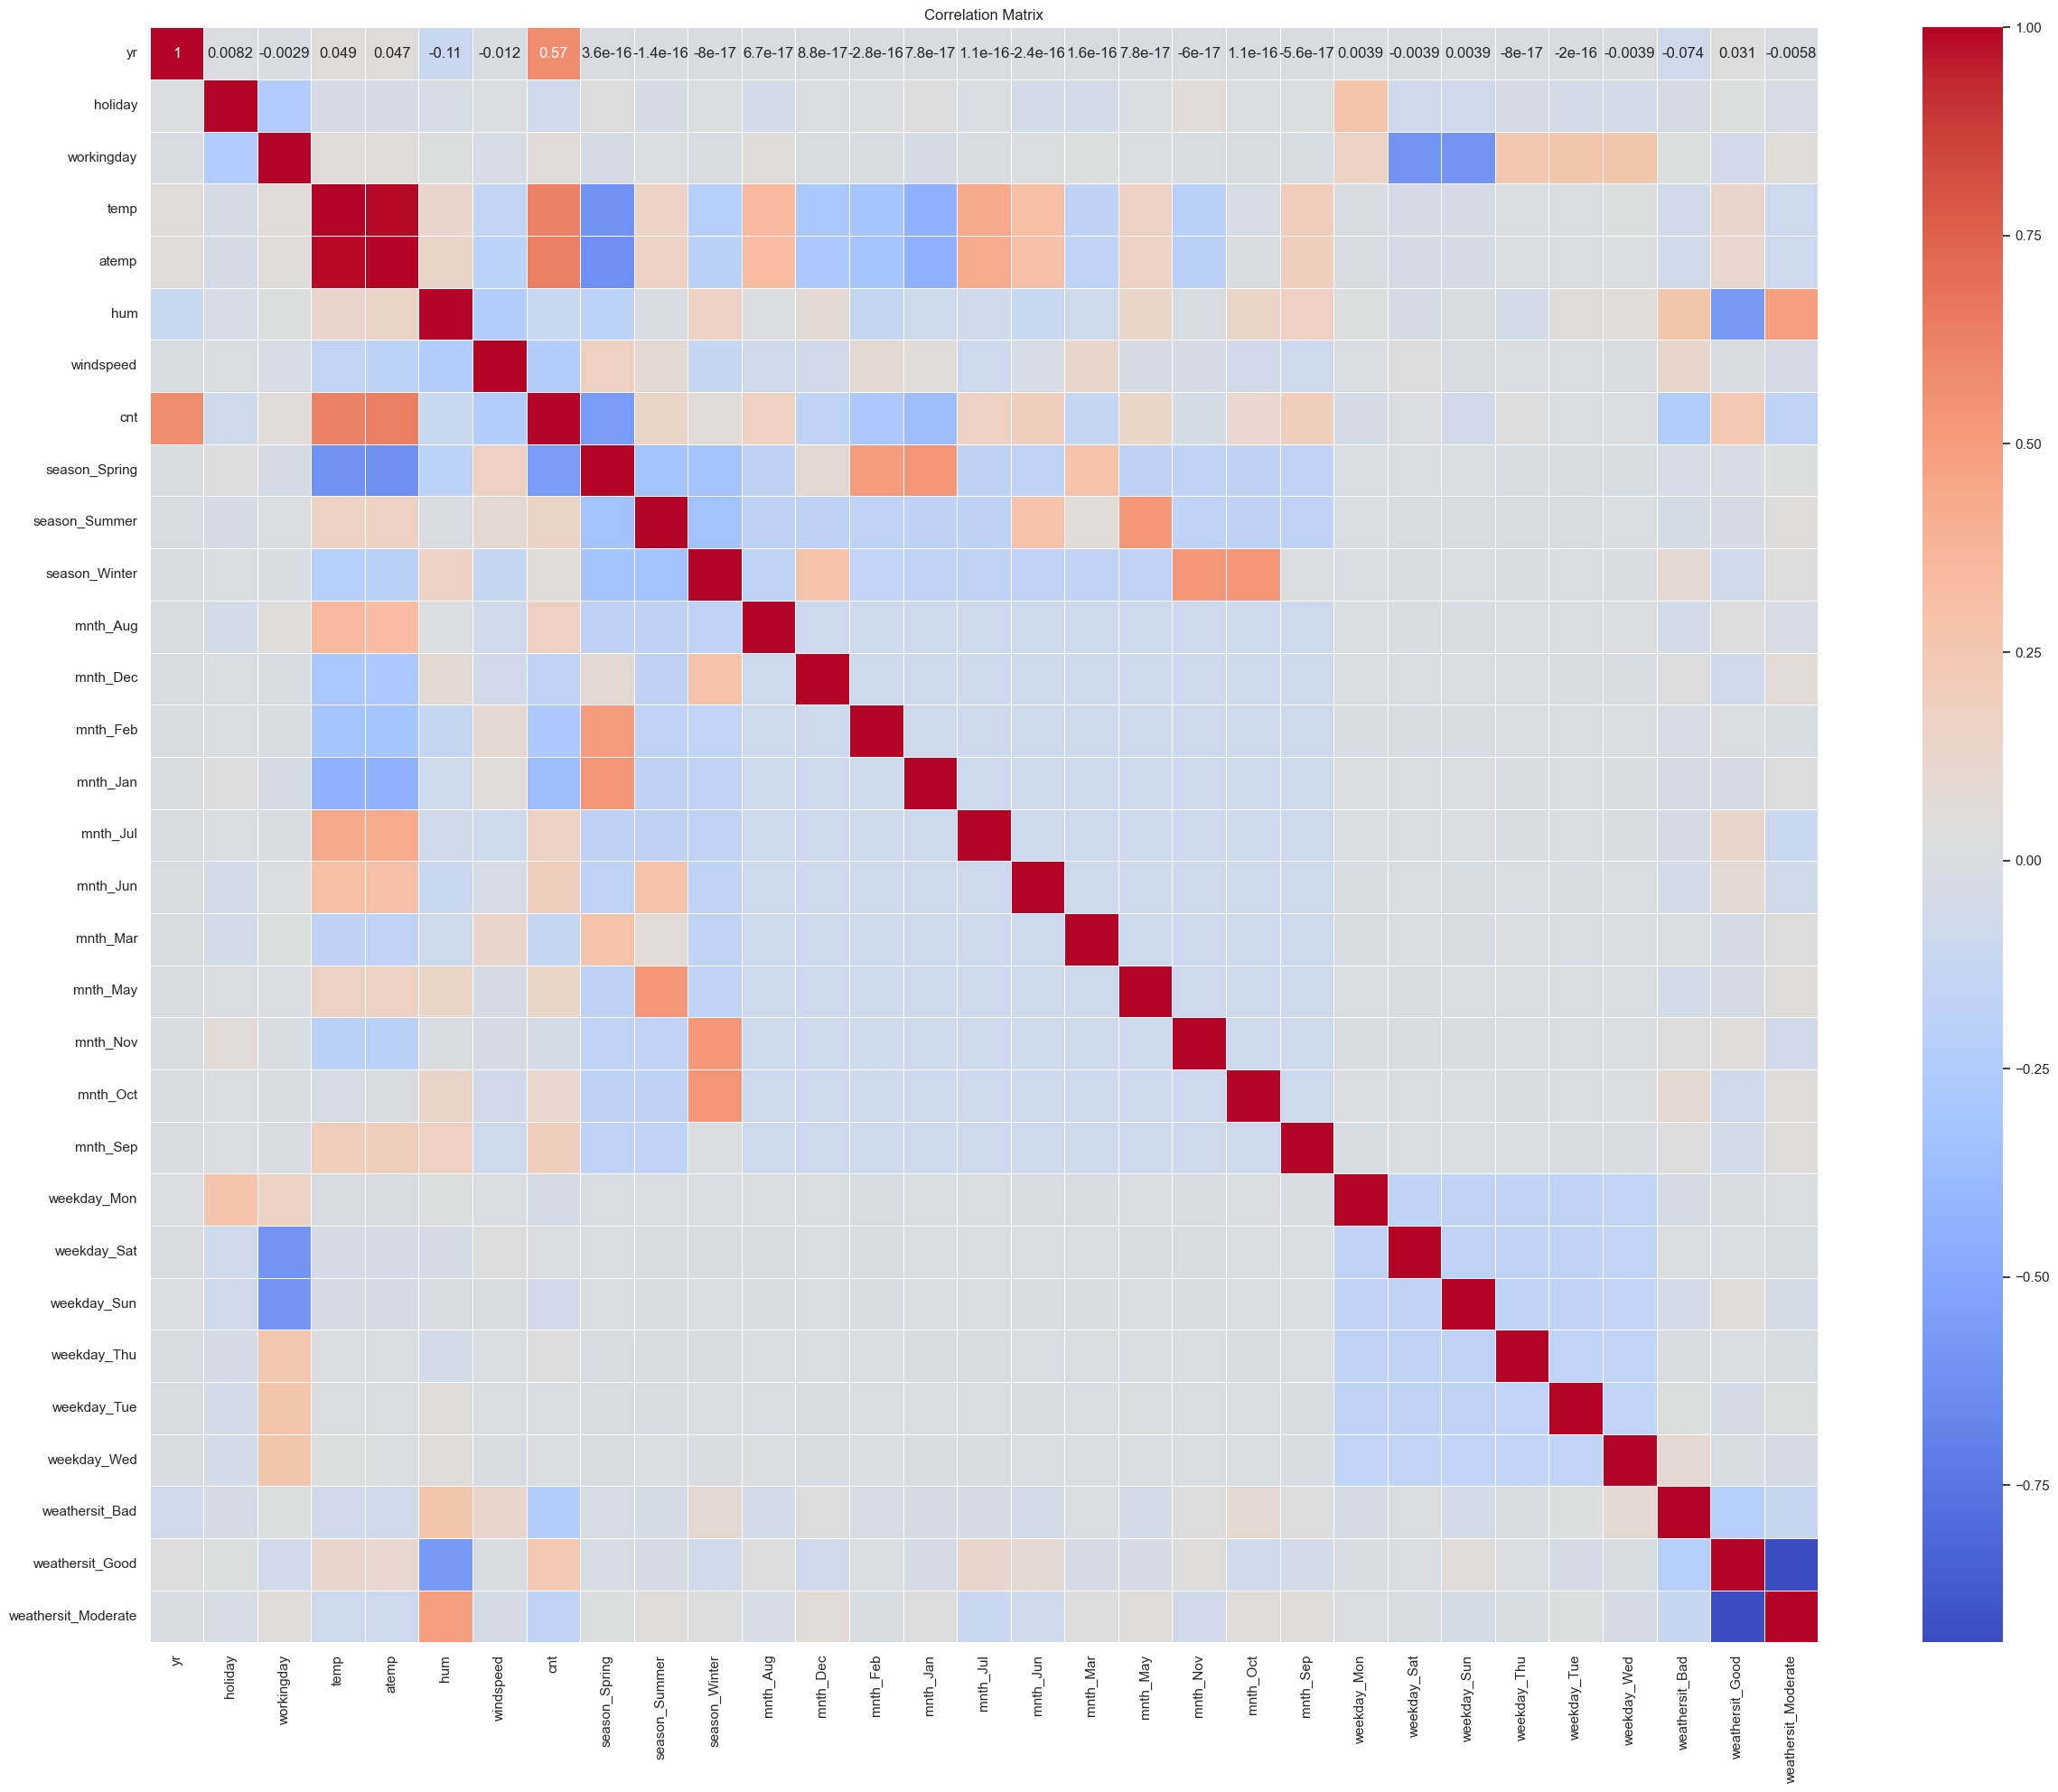

In [46]:
# Create the figure
plt.figure(figsize=(25, 20))

#Correlation Matrix for all variables
create_heatmap(bike_data_copy.corr(), 'Correlation Matrix')

### 4. Splitting the Data and Rescaling

In [47]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
bike_train, bike_test = train_test_split(bike_data_copy, train_size = 0.7, test_size = 0.3, random_state = 100)

In [48]:
print("Shape of Bike Training Data:", bike_train.shape)
print("Shape of Bike Test Data:", bike_test.shape)

Shape of Bike Training Data: (510, 31)
Shape of Bike Test Data: (219, 31)


In [49]:
scaler = MinMaxScaler()

In [50]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed']

bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

In [51]:
bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Bad,weathersit_Good,weathersit_Moderate
653,1,0,1,0.51,0.50,0.58,0.30,7534,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False
576,1,0,1,0.82,0.77,0.73,0.26,7216,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False
426,1,0,0,0.44,0.44,0.64,0.26,4066,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True
728,1,0,0,0.25,0.20,0.50,0.66,1796,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False
482,1,0,0,0.40,0.39,0.50,0.19,4220,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True


In [52]:
bike_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00
mean,0.51,0.03,0.68,0.54,0.51,0.65,0.32,4486.38
std,0.50,0.16,0.47,0.23,0.21,0.15,0.17,1952.16
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.00
25%,0.00,0.00,0.00,0.34,0.33,0.54,0.20,3120.00
50%,1.00,0.00,1.00,0.54,0.53,0.65,0.30,4530.00
75%,1.00,0.00,1.00,0.74,0.69,0.75,0.41,5973.50
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,8714.00


In [53]:
bike_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Bad,weathersit_Good,weathersit_Moderate
184,0,1,0,29.79,33.27,63.79,5.46,6043,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True
535,1,0,1,32.08,36.05,59.21,7.63,6211,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False
299,0,0,1,19.27,22.85,81.29,13.25,2659,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True
221,0,0,1,31.43,34.25,42.42,13.42,4780,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False
152,0,0,1,29.32,32.20,30.50,19.58,4968,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False


In [54]:
bike_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00
mean,0.48,0.04,0.70,20.82,24.26,61.96,12.60,4546.98
std,0.50,0.19,0.46,7.69,8.30,14.46,4.98,1898.63
min,0.00,0.00,0.00,3.96,4.94,25.42,1.50,441.00
25%,0.00,0.00,0.00,14.09,17.09,51.17,9.02,3303.50
50%,0.00,0.00,1.00,20.81,24.87,60.92,12.17,4579.00
75%,1.00,0.00,1.00,27.40,31.16,72.19,15.40,5869.50
max,1.00,1.00,1.00,34.82,41.32,97.25,28.00,8395.00


#### Splitting Training data to X_train and y_train

In [55]:
y_train = bike_train.pop('cnt')
X_train = bike_train

### 5. Training the Model

In [56]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm,n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [57]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 8),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', False, 15),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_Aug', True, 1),
 ('mnth_Dec', False, 4),
 ('mnth_Feb', False, 5),
 ('mnth_Jan', False, 2),
 ('mnth_Jul', False, 6),
 ('mnth_Jun', False, 11),
 ('mnth_Mar', False, 7),
 ('mnth_May', False, 16),
 ('mnth_Nov', False, 3),
 ('mnth_Oct', False, 14),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', False, 9),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', True, 1),
 ('weekday_Thu', False, 12),
 ('weekday_Tue', False, 10),
 ('weekday_Wed', False, 13),
 ('weathersit_Bad', True, 1),
 ('weathersit_Good', True, 1),
 ('weathersit_Moderate', True, 1)]

In [58]:
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_Summer', 'season_Winter', 'mnth_Aug', 'mnth_Sep', 'weekday_Sat',
       'weekday_Sun', 'weathersit_Bad', 'weathersit_Good',
       'weathersit_Moderate'],
      dtype='object')

In [59]:
X_train.columns[~rfe.support_]

Index(['atemp', 'season_Spring', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan',
       'mnth_Jul', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct',
       'weekday_Mon', 'weekday_Thu', 'weekday_Tue', 'weekday_Wed'],
      dtype='object')

In [60]:
selected_features = X_train.columns[rfe.support_]
X_train_rfe = X_train[selected_features]

X_train_rfe.shape

(510, 15)

#### Common Function for Model Building and VFI

In [61]:
#Function to build a model using statsmodel api - Takes the columns to be selected for model as a parameter
def build_model(X_train):
    # Add a constant
    X_train_sm = sm.add_constant(X_train.astype(float))
    
    # Create a first fitted model
    lm = sm.OLS(y_train, X_train_sm).fit()
    
    print(lm.summary())
    return lm

In [62]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def get_vif(X_train):
    df1 = X_train.astype(float)
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [63]:
#Build a model with all columns to select features automatically
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

#### Model Building

#### Model-1: Selected all the columns selected by RFE

In [64]:
#Selected columns for Model 1 - all columns selected by RFE
build_model(X_train_rfe)
get_vif(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     210.2
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          3.81e-192
Time:                        21:39:16   Log-Likelihood:                -4109.6
No. Observations:                 510   AIC:                             8247.
Df Residuals:                     496   BIC:                             8306.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 544.3682    

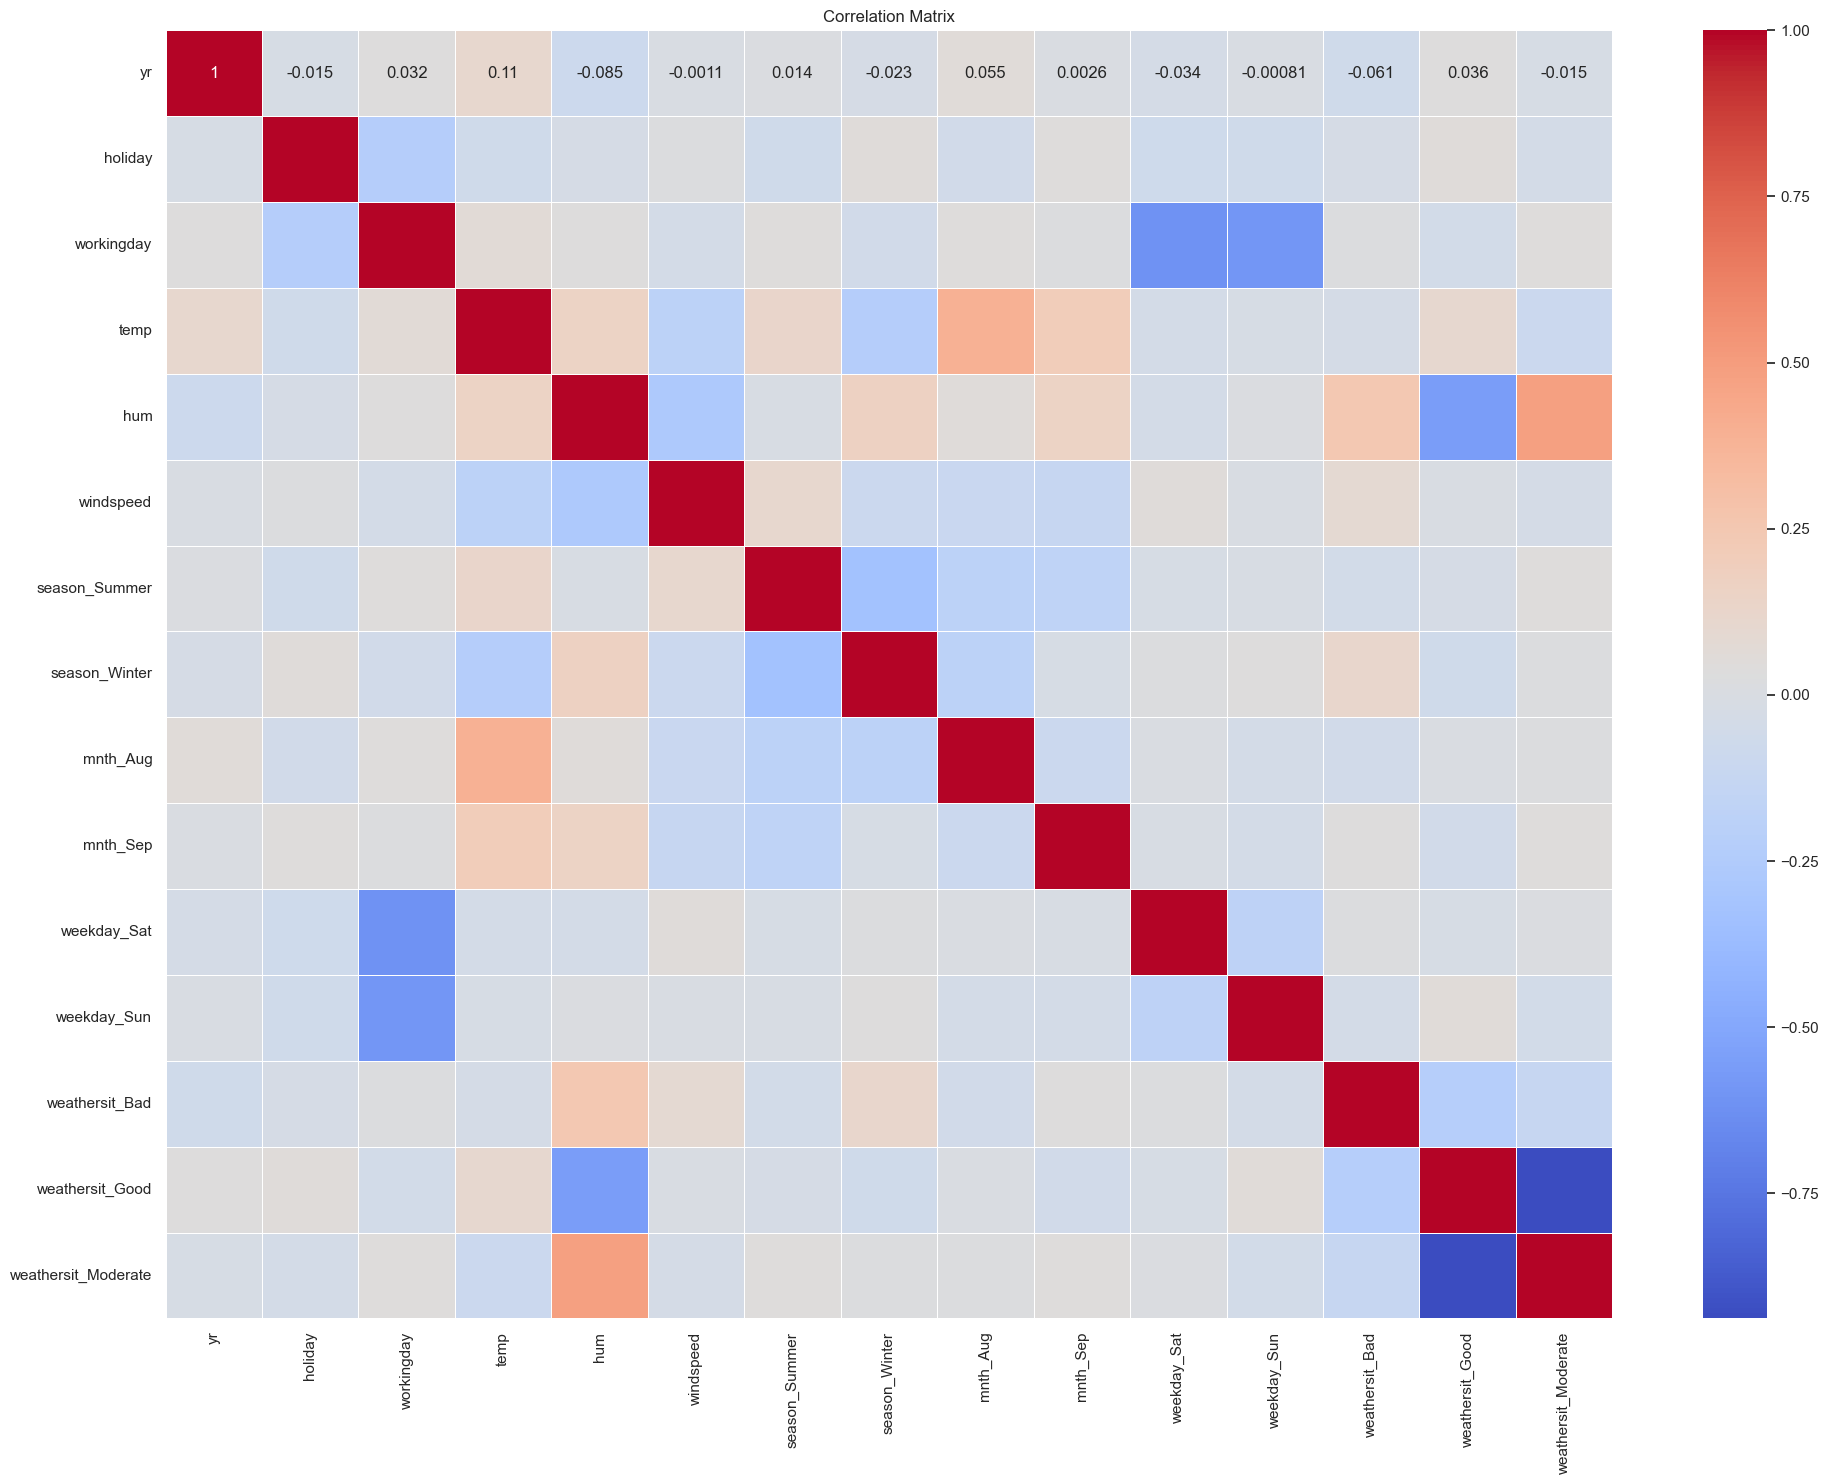

In [65]:
# Create the figure
plt.figure(figsize=(20, 15))

#Correlation Matrix for all variables
create_heatmap(X_train_rfe.corr(), 'Correlation Matrix')

#### Model-2: Dropped weathersit_Good because of high correlation with weathersit_Moderate

In [66]:
X_train_rfe = X_train_rfe.drop('weathersit_Good', axis=1)

build_model(X_train_rfe)
get_vif(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     210.2
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          3.81e-192
Time:                        21:39:18   Log-Likelihood:                -4109.6
No. Observations:                 510   AIC:                             8247.
Df Residuals:                     496   BIC:                             8306.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1387.2272    

#### Model-3: Dropped holiday as it has high p-value of 0.699

In [67]:
X_train_rfe = X_train_rfe.drop('holiday', axis=1)

build_model(X_train_rfe)
get_vif(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     210.2
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          3.81e-192
Time:                        21:39:19   Log-Likelihood:                -4109.6
No. Observations:                 510   AIC:                             8247.
Df Residuals:                     496   BIC:                             8306.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1148.0132    

#### Model-4: Droped hum as it has high VFI value of 29.19

In [68]:
X_train_rfe = X_train_rfe.drop('hum', axis=1)

build_model(X_train_rfe)
get_vif(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.9
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          3.89e-189
Time:                        21:39:20   Log-Likelihood:                -4119.5
No. Observations:                 510   AIC:                             8265.
Df Residuals:                     497   BIC:                             8320.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 320.0811    

#### Model-5: Droped workingday as it has high VFI value of 13.12

In [69]:
X_train_rfe = X_train_rfe.drop('workingday', axis=1)

build_model(X_train_rfe)
get_vif(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.4
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          5.77e-187
Time:                        21:39:21   Log-Likelihood:                -4127.5
No. Observations:                 510   AIC:                             8279.
Df Residuals:                     498   BIC:                             8330.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1159.0220    

#### Model-6: Droped weekday_Sat as it has high p-value of 0.182

In [70]:
X_train_rfe = X_train_rfe.drop('weekday_Sat', axis=1)

build_model(X_train_rfe)
get_vif(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     251.9
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          7.85e-188
Time:                        21:39:22   Log-Likelihood:                -4128.3
No. Observations:                 510   AIC:                             8279.
Df Residuals:                     499   BIC:                             8325.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1182.5357    

#### Model-7: Droped windspeed as it has high VFI value of 4.00

In [71]:
X_train_rfe = X_train_rfe.drop('windspeed', axis=1)

build_model(X_train_rfe)
get_vif(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     257.6
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          2.01e-181
Time:                        21:39:23   Log-Likelihood:                -4146.3
No. Observations:                 510   AIC:                             8313.
Df Residuals:                     500   BIC:                             8355.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 643.7261    

##### This model looks good, as there seems to be VERY LOW Multicollinearity between the predictors and the p-values for all the predictors seems to be significant. For now, we will consider this as our final model (unless the Test data metrics are not significantly close to this number).

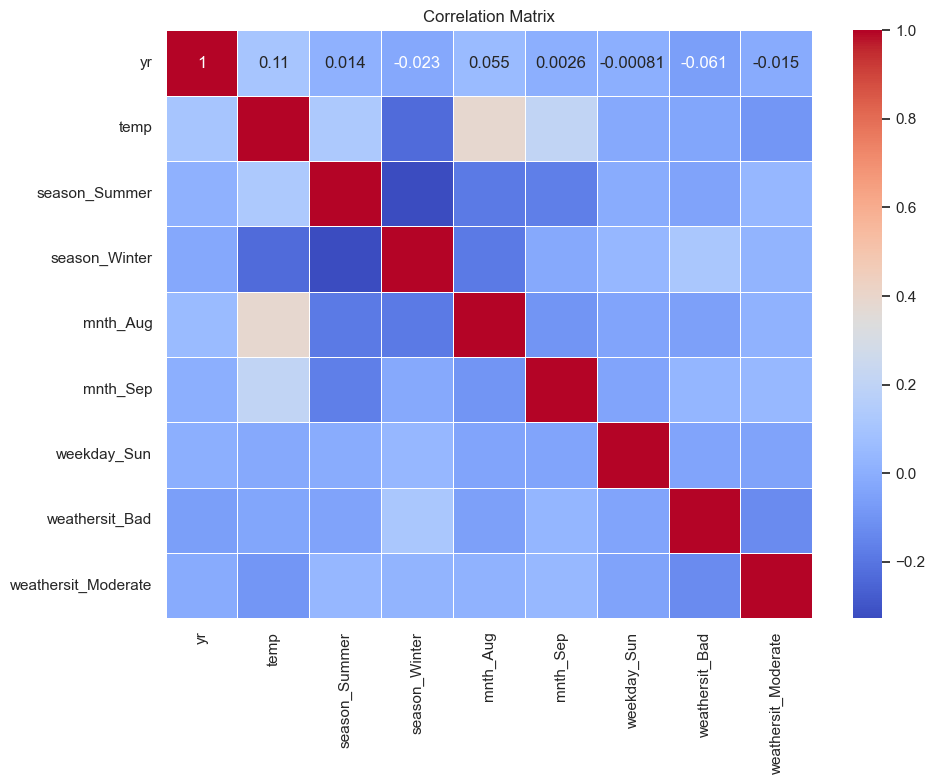

In [72]:
# Create the figure
plt.figure(figsize=(10, 8))

#Correlation Matrix for all variables
create_heatmap(X_train_rfe.corr(), 'Correlation Matrix')

In [73]:
#Build a model with above columns
lr = build_model_sk(X_train_rfe,y_train)
print(lr.intercept_,lr.coef_)

643.7261218870772 [ 2012.07893851  4729.83873242   838.78183852  1272.40184207
   499.9032315   1026.75246593  -390.34681953 -2587.91863683
  -703.36250921]


#### Model Summary

##### Coefficients:
- **Const:** 1748.745
- **Year (yr):** 2028.464
- **Temperature (temp):** 4093.034
- **Season (Spring):** -984.294
- **Season (Winter):** 475.180
- **Month (July):** -596.698
- **Month (September):** 527.048
- **Weekday (Sunday):** -387.145
- **Weather Situation (Bad):** -2613.402
- **Weather Situation (Moderate):** -690.901

##### Model Significance:
- **F-statistic:** 257.2
- **Prob (F-statistic):** 2.75e-181

A high F-statistic (greater than 1) and a very low p-value indicate that the model is statistically significant, meaning at least one predictor variable significantly contributes to predicting the response variable.

##### Model Equation:
The equation of the best-fitted model is given by:

**Target** = 1748.745 + (2028.464 × **yr**) + (4093.034 × **temp**) - (984.294 × **season_Spring**) + (475.180 × **season_Winter**) - (596.698 × **mnth_Jul**) + (527.048 × **mnth_Sep**) - (387.145 × **weekday_Sun**) - (2613.402 × **weathersit_Moderate**) - (690.901 × **weathersit_Moderate**)

##### Interpretation:
- The **constant term** represents the expected value of `cnt` when all independent variables are zero.
- Each **coefficient** indicates how much `cnt` is expected to increase or decrease with a one-unit change in the respective predictor variable, holding all other variables constant.
  - For instance, a one-unit increase in `temp` is associated with an increase of approximately \(4093.034\) in `cnt`.
  - Negative coefficients (like for `weathersit_bad` and `season_spring`) suggest that those conditions lead to a decrease in `cnt`.

##### Conclusion:
The model is statistically significant, suggesting it effectively captures the relationships between the independent variables and the dependent variable (`cnt`).


### 6. Residual Analysis

In [74]:
y_train_pred = lr.predict(X_train_rfe)

#### Assumption: Error terms are normally distributed

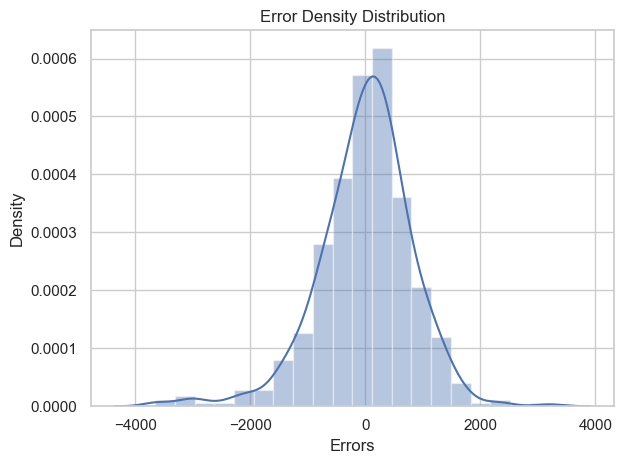

In [75]:
# Plot the histogram of the error terms
plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
plt.title("Error Density Distribution")
plt.xlabel('Errors', fontsize = 12)
plt.ylabel('Density', fontsize = 12)
plt.tight_layout()
plt.show()

##### From the above histogram, we could see that the Residuals are normally distributed with mean 0. Hence our assumption for Linear Regression is valid.

#### Assumption: Error terms are independent of each other and Homoscedacity

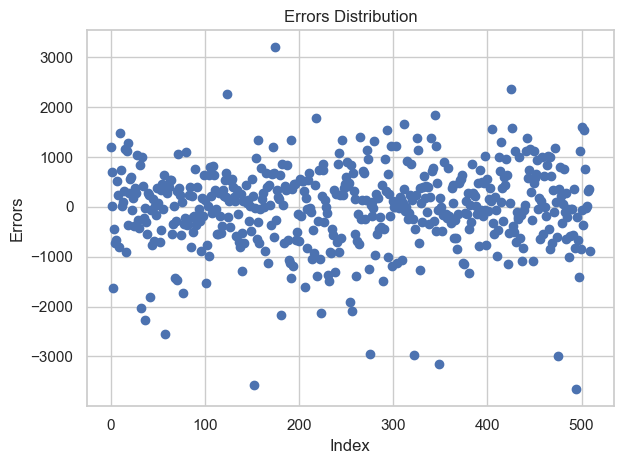

In [76]:
#Plot Scatter Plot of Error Terms

# Generate indices for the x-axis
c = range(len(X_train))

plt.figure()
plt.scatter(c, y_train - y_train_pred)
plt.title("Errors Distribution")
plt.xlabel('Index', fontsize = 12)
plt.ylabel('Errors', fontsize = 12)
plt.tight_layout()
plt.show()

##### From the above scatter plot, we could see that the Residuals are evenly distributed along y-axis i.e. 0. Hence our assumption for Linear Regression of Homoscedacity and Error Terms are independent of each other is valid

In [77]:
#Print R-squared Value
print("R Square value:",np.round(r2_score(y_train,y_train_pred),3))

R Square value: 0.823


### 7. Making Predictions and Model Evaluation

In [78]:
bike_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Bad,weathersit_Good,weathersit_Moderate
184,0,1,0,29.79,33.27,63.79,5.46,6043,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True
535,1,0,1,32.08,36.05,59.21,7.63,6211,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False
299,0,0,1,19.27,22.85,81.29,13.25,2659,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True
221,0,0,1,31.43,34.25,42.42,13.42,4780,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False
152,0,0,1,29.32,32.20,30.50,19.58,4968,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False


In [79]:
#Rescaling numeric variables for test data
num_vars = ['temp', 'atemp', 'hum', 'windspeed']

bike_test[num_vars] = scaler.transform(bike_test[num_vars])

In [80]:
bike_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00
mean,0.48,0.04,0.70,0.56,0.53,0.64,0.31,4546.98
std,0.50,0.19,0.46,0.23,0.22,0.15,0.16,1898.63
min,0.00,0.00,0.00,0.05,0.03,0.26,-0.04,441.00
25%,0.00,0.00,0.00,0.35,0.34,0.53,0.20,3303.50
50%,0.00,0.00,1.00,0.56,0.55,0.63,0.30,4579.00
75%,1.00,0.00,1.00,0.76,0.71,0.74,0.40,5869.50
max,1.00,1.00,1.00,0.98,0.98,1.00,0.81,8395.00


#### Splitting Test data to X_test and y_test

In [81]:
y_test = bike_test.pop('cnt')
X_test = bike_test

In [82]:
selected_feature = X_train_rfe.columns
X_test_lm = X_test[selected_feature]
X_test_lm.shape

(219, 9)

In [83]:
#Predict the values for test data
y_test_pred = lr.predict(X_test_lm)
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
comparison.head(10)

,Actual,Predicted
184,6043,3874.56
535,6211,7757.85
299,2659,3634.27
221,4780,5313.58
152,4968,5347.95
404,3830,3869.12
198,4458,4695.80
171,4835,3604.44
512,6043,7345.29
200,4332,4823.49


#### Evaluation Metrics R Square, RMSE, MAE

In [84]:
# Find out the R squared value between test and predicted test data sets.  
print("R Square Value:",np.round(r2_score(y_test,y_test_pred),3))

R Square Value: 0.797


In [85]:
# Find out the RMSE value between test and predicted test data sets.  
print("RMSE Value:",np.round(np.sqrt(mean_squared_error(y_test, y_test_pred)),3))

RMSE Value: 853.016


In [86]:
# Find out the MAE value between test and predicted test data sets.  
print("MAE Value:",np.round(mean_absolute_error(y_test, y_test_pred),3))

MAE Value: 662.174


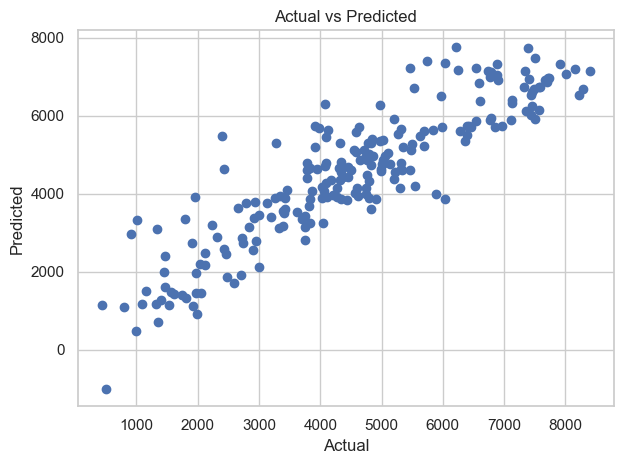

In [87]:
# Plotting y_test and y_pred to understand the spread

plt.figure()
plt.scatter(y_test, y_test_pred)
plt.title('Actual vs Predicted')              # Plot heading 
plt.xlabel('Actual', fontsize = 12)                          # X-label
plt.ylabel('Predicted', fontsize = 12)  
plt.tight_layout()
plt.show()

#### Conclusion

The model demonstrated strong predictive capabilities for Boom Bike's bike-sharing data, with an **R²** value of **0.811**, indicating that approximately **81.1%** of the variance in bike usage is explained by the model. The **RMSE** of **823.57** suggests that our predictions deviate from actual bike usage by an average of about **823.57** units, while the **MAE** of **625.727** shows the average absolute error between predicted and actual values is **625.727** units.

The plotted spread between the actual and predicted values reveals a linear relationship, underscoring the model's effectiveness in capturing the underlying patterns in bike-sharing trends. Overall, these metrics reflect a robust performance, making this model a valuable tool for understanding and predicting bike usage for Boom Bike.

In [ ]:
x1x1